In [1]:
# import libraries
import numpy as np
import pandas as pd
import torch
from torch import nn
from skorch import NeuralNetClassifier
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV
from joblib import dump
import time
import matplotlib.pyplot as plt

In [2]:
# Read the datasets
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

# Convert dataframes to series
y_train = y_train.squeeze()

In [3]:
# Convert datasets into tensor
x_trainTensor = torch.tensor(x_train.to_numpy()).float()
y_trainTensor = torch.tensor(y_train.to_numpy()).long()

In [4]:
# Set parameters
input_size = len(x_train.columns)
hidden_size = 100
output_size = 2

In [5]:
# Bulid a MLP model
class Net(nn.Module):
     def __init__(self, hidden_size=100, nonlin=F.relu):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.nonlin = nonlin
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
 
     def forward(self, x, **kwargs):
        hidden = self.nonlin(self.fc1(x))
        hidden = F.relu(self.fc2(hidden))
        out = F.softmax(self.fc3(hidden), dim=1)
        return out

net = NeuralNetClassifier(Net)

In [6]:
# Optimise the hyperparameters by grid search
params = {
    'lr': [0.05,0.1,0.2],
    'optimizer__momentum': [0.85,0.9,0.95],
    'module__hidden_size': [50,100,200],
}
gs = GridSearchCV(net, params, refit=True, cv=10,verbose=0)

start = time.time()

gs.fit(x_trainTensor, y_trainTensor)

end = time.time()

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6897       0.5909        0.6889  0.0069
      2        0.6858       0.7045        0.6837  0.0067
      3        0.6792       0.7500        0.6771  0.0056
      4        0.6706       0.7727        0.6692  0.0053
      5        0.6602       0.8182        0.6597  0.0054
      6        0.6475       0.8182        0.6477  0.0052
      7        0.6315       0.7955        0.6327  0.0053
      8        0.6114       0.7955        0.6141  0.0054
      9        0.5864       0.7955        0.5917  0.0053
     10        0.5562       0.7955        0.5659  0.0053
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6863       0.5455        0.6856  0.0045
      2        0.6831       0.5909        0.6817  0.0057
      3        0.6776       0.6818        0.6764  0.0051
      4        0.6702       0.8

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6791       0.6818        0.6827  0.0056
      2        0.6739       0.6818        0.6755  0.0066
      3        0.6645       0.6818        0.6659  0.0060
      4        0.6519       0.6818        0.6544  0.0055
      5        0.6362       0.6818        0.6409  0.0057
      6        0.6171       0.6591        0.6243  0.0061
      7        0.5932       0.6818        0.6046  0.0056
      8        0.5636       0.7273        0.5820  0.0048
      9        0.5284       0.7500        0.5577  0.0062
     10        0.4889       0.7500        0.5349  0.0056
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6921       0.5455        0.6886  0.0044
      2        0.6886       0.5455        0.6845  0.0059
      3        0.6824       0.5455        0.6783  0.0061
      4        0.6737       0.5

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6988       0.4545        0.6959  0.0052
      2        0.6907       0.5455        0.6837  0.0049
      3        0.6770       0.7273        0.6696  0.0050
      4        0.6608       0.6591        0.6558  0.0058
      5        0.6442       0.6591        0.6417  0.0052
      6        0.6256       0.6591        0.6251  0.0058
      7        0.6012       0.6818        0.6027  0.0054
      8        0.5671       0.7500        0.5739  0.0048
      9        0.5222       0.7727        0.5402  0.0048
     10        0.4681       0.7500        0.5068  0.0062
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6891       0.5227        0.6869  0.0059
      2        0.6848       0.6136        0.6808  0.0078
      3        0.6772       0.5455        0.6731  0.0065
      4        0.6678       0.5

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6924       0.5455        0.6865  0.0064
      2        0.6888       0.5455        0.6813  0.0066
      3        0.6818       0.5455        0.6739  0.0065
      4        0.6720       0.6364        0.6643  0.0049
      5        0.6594       0.6818        0.6517  0.0047
      6        0.6428       0.7727        0.6345  0.0065
      7        0.6205       0.7727        0.6108  0.0075
      8        0.5898       0.8182        0.5792  0.0049
      9        0.5477       0.7955        0.5391  0.0063
     10        0.4929       0.7727        0.4948  0.0052
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7023       0.4545        0.6924  0.0061
      2        0.6964       0.6818        0.6838  0.0064
      3        0.6861       0.7273        0.6736  0.0058
      4        0.6736       0.5

      2        0.6959       0.5455        0.6873  0.0061
      3        0.6876       0.5909        0.6803  0.0054
      4        0.6771       0.6818        0.6716  0.0058
      5        0.6648       0.7500        0.6608  0.0064
      6        0.6502       0.7727        0.6474  0.0058
      7        0.6324       0.7727        0.6304  0.0059
      8        0.6102       0.7955        0.6092  0.0060
      9        0.5824       0.8182        0.5827  0.0056
     10        0.5477       0.8409        0.5519  0.0055
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7049       0.4545        0.6983  0.0049
      2        0.6912       0.6818        0.6777  0.0064
      3        0.6705       0.7045        0.6557  0.0055
      4        0.6485       0.7273        0.6332  0.0067
      5        0.6246       0.7273        0.6077  0.0056
      6        0.5958       0.7955        0.5778  0.0062
      7        0.5601       0.7

      2        0.6847       0.7045        0.6779  0.0059
      3        0.6679       0.6818        0.6612  0.0049
      4        0.6452       0.7500        0.6402  0.0057
      5        0.6165       0.7273        0.6150  0.0061
      6        0.5807       0.7273        0.5850  0.0062
      7        0.5368       0.7500        0.5506  0.0053
      8        0.4850       0.7500        0.5155  0.0066
      9        0.4290       0.7273        0.4870  0.0051
     10        0.3775       0.7045        0.4739  0.0060
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7028       0.4545        0.6981  0.0045
      2        0.6918       0.7955        0.6843  0.0064
      3        0.6744       0.6136        0.6698  0.0070
      4        0.6549       0.6364        0.6551  0.0049
      5        0.6332       0.6364        0.6372  0.0053
      6        0.6058       0.6818        0.6136  0.0066
      7        0.5702       0.6

      4        0.6606       0.6136        0.6511  0.0055
      5        0.6394       0.6818        0.6326  0.0067
      6        0.6136       0.7273        0.6096  0.0050
      7        0.5806       0.7273        0.5802  0.0058
      8        0.5382       0.7045        0.5451  0.0056
      9        0.4869       0.7500        0.5091  0.0049
     10        0.4319       0.7500        0.4813  0.0058
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6883       0.5455        0.6876  0.0042
      2        0.6837       0.5455        0.6806  0.0062
      3        0.6747       0.5909        0.6706  0.0059
      4        0.6615       0.6364        0.6575  0.0052
      5        0.6436       0.7045        0.6400  0.0056
      6        0.6192       0.7727        0.6159  0.0055
      7        0.5854       0.7955        0.5823  0.0063
      8        0.5392       0.7955        0.5394  0.0053
      9        0.4800       0.7

      5        0.5871       0.7727        0.5873  0.0060
      6        0.5439       0.7500        0.5508  0.0064
      7        0.4940       0.7273        0.5120  0.0060
      8        0.4409       0.7273        0.4781  0.0073
      9        0.3922       0.7500        0.4564  0.0062
     10        0.3549       0.7500        0.4497  0.0063
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6964       0.5682        0.6871  0.0052
      2        0.6845       0.7500        0.6711  0.0062
      3        0.6634       0.7273        0.6500  0.0074
      4        0.6358       0.7500        0.6247  0.0057
      5        0.6020       0.7045        0.5951  0.0068
      6        0.5614       0.7045        0.5616  0.0062
      7        0.5142       0.7273        0.5272  0.0057
      8        0.4627       0.7500        0.4976  0.0064
      9        0.4135       0.7500        0.4780  0.0069
     10        0.3732       0.7

      7        0.4809       0.7955        0.5076  0.0075
      8        0.4261       0.7955        0.4790  0.0063
      9        0.3809       0.7727        0.4657  0.0068
     10        0.3507       0.7727        0.4682  0.0071
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6883       0.5909        0.6804  0.0056
      2        0.6755       0.7045        0.6642  0.0077
      3        0.6517       0.7955        0.6415  0.0060
      4        0.6190       0.8182        0.6119  0.0069
      5        0.5770       0.8409        0.5748  0.0065
      6        0.5242       0.8409        0.5313  0.0060
      7        0.4620       0.8182        0.4904  0.0068
      8        0.3997       0.7955        0.4644  0.0060
      9        0.3509       0.7955        0.4608  0.0075
     10        0.3240       0.8182        0.4749  0.0070
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  --------

     10        0.3260       0.8182        0.4637  0.0077
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7020       0.5455        0.6973  0.0053
      2        0.6916       0.5455        0.6824  0.0087
      3        0.6721       0.7273        0.6614  0.0065
      4        0.6457       0.7273        0.6354  0.0066
      5        0.6124       0.7955        0.6027  0.0067
      6        0.5696       0.7955        0.5613  0.0069
      7        0.5146       0.7955        0.5133  0.0070
      8        0.4496       0.7955        0.4705  0.0058
      9        0.3872       0.7955        0.4526  0.0056
     10        0.3447       0.7727        0.4677  0.0067
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7034       0.6136        0.6897  0.0051
      2        0.6849       0.6136        0.6672  0.0083
      3        0.6561       0.6

      2        0.6918       0.6818        0.6856  0.0055
      3        0.6818       0.7045        0.6767  0.0053
      4        0.6697       0.7273        0.6659  0.0057
      5        0.6539       0.7500        0.6505  0.0044
      6        0.6315       0.7727        0.6277  0.0052
      7        0.5990       0.7727        0.5946  0.0065
      8        0.5531       0.7955        0.5489  0.0064
      9        0.4943       0.7955        0.4943  0.0051
     10        0.4276       0.7727        0.4462  0.0064
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6896       0.5682        0.6880  0.0040
      2        0.6808       0.6591        0.6781  0.0059
      3        0.6659       0.7045        0.6641  0.0058
      4        0.6448       0.7727        0.6446  0.0051
      5        0.6152       0.8182        0.6160  0.0050
      6        0.5714       0.7955        0.5758  0.0061
      7        0.5102       0.7

      4        0.6598       0.7955        0.6495  0.0049
      5        0.6363       0.8409        0.6235  0.0050
      6        0.5997       0.7955        0.5833  0.0059
      7        0.5426       0.8182        0.5261  0.0045
      8        0.4622       0.8182        0.4701  0.0056
      9        0.3775       0.8182        0.4551  0.0065
     10        0.3249       0.8182        0.4960  0.0057
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6883       0.6591        0.6856  0.0047
      2        0.6835       0.6591        0.6778  0.0065
      3        0.6745       0.7955        0.6655  0.0055
      4        0.6603       0.7955        0.6477  0.0047
      5        0.6388       0.8182        0.6192  0.0059
      6        0.6044       0.8636        0.5740  0.0050
      7        0.5494       0.8409        0.5077  0.0059
      8        0.4713       0.8409        0.4366  0.0055
      9        0.3869       0.8

      7        0.5906       0.7500        0.5764  0.0055
      8        0.5321       0.7500        0.5260  0.0053
      9        0.4544       0.7500        0.4845  0.0050
     10        0.3785       0.7500        0.4872  0.0055
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7005       0.4773        0.6890  0.0054
      2        0.6894       0.7727        0.6736  0.0055
      3        0.6709       0.8409        0.6529  0.0060
      4        0.6444       0.8409        0.6222  0.0046
      5        0.6030       0.7955        0.5762  0.0050
      6        0.5387       0.7955        0.5193  0.0065
      7        0.4533       0.8182        0.4652  0.0046
      8        0.3641       0.7955        0.4619  0.0053
      9        0.3152       0.8182        0.5476  0.0051
     10        0.3115       0.7955        0.7100  0.0068
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  --------

      2        0.6917       0.6818        0.6788  0.0066
      3        0.6751       0.5455        0.6655  0.0053
      4        0.6585       0.5455        0.6514  0.0050
      5        0.6365       0.6136        0.6251  0.0057
      6        0.5936       0.7273        0.5795  0.0053
      7        0.5217       0.7727        0.5321  0.0062
      8        0.4353       0.7955        0.5052  0.0067
      9        0.3558       0.7727        0.5264  0.0066
     10        0.3246       0.7500        0.6230  0.0054
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6993       0.6591        0.6826  0.0049
      2        0.6814       0.7045        0.6625  0.0061
      3        0.6526       0.7727        0.6377  0.0060
      4        0.6152       0.7727        0.6044  0.0054
      5        0.5640       0.7727        0.5583  0.0060
      6        0.4944       0.7727        0.5074  0.0052
      7        0.4156       0.7

      5        0.5562       0.7045        0.5616  0.0048
      6        0.4844       0.7273        0.5150  0.0063
      7        0.4032       0.7500        0.4905  0.0051
      8        0.3371       0.7500        0.5003  0.0048
      9        0.3014       0.7500        0.5344  0.0071
     10        0.2891       0.7500        0.5662  0.0062
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6871       0.5455        0.6756  0.0045
      2        0.6760       0.6818        0.6608  0.0059
      3        0.6556       0.7500        0.6395  0.0066
      4        0.6261       0.7955        0.6092  0.0055
      5        0.5840       0.7500        0.5687  0.0066
      6        0.5256       0.7500        0.5224  0.0055
      7        0.4541       0.7500        0.4867  0.0058
      8        0.3877       0.7500        0.4828  0.0062
      9        0.3456       0.7500        0.5082  0.0054
     10        0.3282       0.7

     10        0.3202       0.7500        0.5558  0.0051
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7042       0.4773        0.6941  0.0056
      2        0.6790       0.7045        0.6646  0.0049
      3        0.6430       0.6818        0.6328  0.0057
      4        0.5970       0.7273        0.5870  0.0066
      5        0.5255       0.7727        0.5304  0.0062
      6        0.4347       0.7727        0.4917  0.0053
      7        0.3563       0.7727        0.4947  0.0063
      8        0.3133       0.7273        0.5545  0.0052
      9        0.3128       0.7273        0.6033  0.0056
     10        0.3115       0.7727        0.6327  0.0072
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7064       0.5000        0.6942  0.0049
      2        0.6939       0.5455        0.6785  0.0059
      3        0.6750       0.5

      5        0.5397       0.7500        0.5117  0.0050
      6        0.4517       0.7955        0.4553  0.0053
      7        0.3639       0.7500        0.4615  0.0065
      8        0.3291       0.7727        0.5221  0.0049
      9        0.3371       0.7727        0.5929  0.0058
     10        0.3498       0.7955        0.6545  0.0068
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7038       0.5227        0.6900  0.0058
      2        0.6817       0.5455        0.6641  0.0056
      3        0.6507       0.5682        0.6387  0.0050
      4        0.6147       0.6364        0.5988  0.0048
      5        0.5538       0.7500        0.5292  0.0052
      6        0.4556       0.7727        0.4693  0.0063
      7        0.3595       0.7727        0.4738  0.0055
      8        0.3089       0.7727        0.5596  0.0069
      9        0.3150       0.7727        0.6784  0.0049
     10        0.3496       0.7

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6784       0.7500        0.6685  0.0073
      2        0.6525       0.7273        0.6354  0.0060
      3        0.6048       0.7273        0.5875  0.0091
      4        0.5369       0.7500        0.5285  0.0077
      5        0.4538       0.7500        0.4792  0.0064
      6        0.3781       0.7500        0.4661  0.0070
      7        0.3344       0.7273        0.4845  0.0071
      8        0.3196       0.7500        0.5076  0.0084
      9        0.3141       0.7500        0.5185  0.0062
     10        0.3059       0.7727        0.5217  0.0078
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7000       0.5909        0.6705  0.0069
      2        0.6646       0.6591        0.6345  0.0062
      3        0.6066       0.7045        0.5893  0.0075
      4        0.5318       0.7

      6        0.4183       0.7727        0.4719  0.0061
      7        0.3621       0.8182        0.4847  0.0080
      8        0.3469       0.8182        0.5100  0.0056
      9        0.3413       0.7727        0.5197  0.0067
     10        0.3191       0.7955        0.5295  0.0071
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6901       0.6364        0.6724  0.0057
      2        0.6694       0.6364        0.6458  0.0077
      3        0.6336       0.7273        0.6082  0.0058
      4        0.5810       0.7500        0.5557  0.0067
      5        0.5063       0.7500        0.4981  0.0074
      6        0.4217       0.7727        0.4583  0.0061
      7        0.3572       0.7727        0.4593  0.0068
      8        0.3319       0.7727        0.4823  0.0069
      9        0.3273       0.7727        0.5066  0.0061
     10        0.3227       0.7955        0.5154  0.0073
  epoch    train_loss    valid_

      3        0.6315       0.7727        0.6053  0.0064
      4        0.5668       0.7500        0.5428  0.0078
      5        0.4765       0.7500        0.4835  0.0064
      6        0.3848       0.7500        0.4784  0.0081
      7        0.3371       0.7500        0.5424  0.0075
      8        0.3350       0.7500        0.6226  0.0066
      9        0.3406       0.7955        0.6912  0.0069
     10        0.3337       0.7955        0.7365  0.0061
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6982       0.6364        0.6840  0.0064
      2        0.6728       0.7045        0.6513  0.0074
      3        0.6282       0.7045        0.6061  0.0068
      4        0.5634       0.7500        0.5427  0.0067
      5        0.4710       0.7955        0.4854  0.0068
      6        0.3803       0.7727        0.4776  0.0069
      7        0.3389       0.7955        0.5236  0.0074
      8        0.3427       0.7

     10        0.2990       0.7955        0.6061  0.0049
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6821       0.5455        0.6692  0.0044
      2        0.6643       0.7955        0.6484  0.0051
      3        0.6375       0.7727        0.6083  0.0057
      4        0.5856       0.7955        0.5326  0.0062
      5        0.4875       0.7500        0.4612  0.0060
      6        0.3782       0.7727        0.4742  0.0054
      7        0.3345       0.7500        0.5331  0.0051
      8        0.3240       0.7727        0.5810  0.0063
      9        0.3069       0.7727        0.6185  0.0047
     10        0.3003       0.7727        0.6029  0.0050
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7011       0.5455        0.6865  0.0046
      2        0.6857       0.5682        0.6676  0.0065
      3        0.6607       0.7

      4        0.6096       0.8182        0.5776  0.0051
      5        0.5215       0.7727        0.4928  0.0058
      6        0.3990       0.7955        0.4754  0.0046
      7        0.3388       0.7955        0.5489  0.0051
      8        0.3446       0.7727        0.5846  0.0062
      9        0.3165       0.7727        0.6509  0.0062
     10        0.3062       0.7955        0.5817  0.0059
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6922       0.6818        0.6723  0.0047
      2        0.6675       0.7273        0.6413  0.0056
      3        0.6218       0.7727        0.5925  0.0063
      4        0.5461       0.7727        0.5250  0.0050
      5        0.4425       0.7727        0.4761  0.0055
      6        0.3596       0.7500        0.5257  0.0054
      7        0.3451       0.7727        0.6147  0.0061
      8        0.3551       0.7955        0.6365  0.0052
      9        0.3191       0.7

      2        0.6680       0.7727        0.6315  0.0053
      3        0.6144       0.7727        0.5629  0.0048
      4        0.5203       0.7955        0.4716  0.0062
      5        0.3894       0.7727        0.4721  0.0046
      6        0.3271       0.7500        0.6125  0.0048
      7        0.3437       0.7955        0.7932  0.0085
      8        0.3457       0.7955        0.8229  0.0056
      9        0.3018       0.7955        0.6929  0.0059
     10        0.2830       0.7955        0.6309  0.0060
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6918       0.7045        0.6631  0.0059
      2        0.6553       0.6818        0.6212  0.0057
      3        0.6022       0.7273        0.5436  0.0050
      4        0.4916       0.7955        0.5088  0.0065
      5        0.4102       0.7727        0.5029  0.0048
      6        0.3667       0.7273        0.6202  0.0049
      7        0.3697       0.8

     10        0.2989       0.7727        0.5387  0.0060
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6920       0.6591        0.6737  0.0044
      2        0.6727       0.7273        0.6488  0.0071
      3        0.6374       0.7500        0.6056  0.0055
      4        0.5743       0.7727        0.5315  0.0072
      5        0.4677       0.7727        0.4570  0.0053
      6        0.3558       0.7727        0.4704  0.0057
      7        0.3190       0.7727        0.5292  0.0060
      8        0.3207       0.7727        0.5456  0.0054
      9        0.3045       0.7955        0.5290  0.0060
     10        0.2841       0.7955        0.5050  0.0054
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7077       0.6591        0.6849  0.0042
      2        0.6814       0.7727        0.6559  0.0065
      3        0.6429       0.7

      6        0.3540       0.7955        0.4918  0.0050
      7        0.3384       0.7955        0.5751  0.0068
      8        0.3297       0.7955        0.6326  0.0053
      9        0.3001       0.8182        0.6563  0.0048
     10        0.3031       0.8182        0.6500  0.0073
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6855       0.7500        0.6781  0.0052
      2        0.6610       0.7727        0.6443  0.0068
      3        0.6091       0.7727        0.5899  0.0058
      4        0.5180       0.7955        0.5251  0.0057
      5        0.3988       0.7500        0.5218  0.0056
      6        0.3270       0.7273        0.6099  0.0066
      7        0.3233       0.7500        0.6877  0.0054
      8        0.3193       0.7955        0.6920  0.0053
      9        0.2832       0.7955        0.6772  0.0058
     10        0.2700       0.7955        0.6653  0.0054
  epoch    train_loss    valid_

      3        0.6558       0.7727        0.6336  0.0056
      4        0.6081       0.7727        0.5692  0.0049
      5        0.5116       0.7500        0.4911  0.0064
      6        0.3851       0.7500        0.5323  0.0056
      7        0.3439       0.7727        0.6758  0.0058
      8        0.3659       0.7727        0.8044  0.0061
      9        0.3569       0.8182        0.9212  0.0065
     10        0.3603       0.8182        0.8551  0.0049
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6984       0.5909        0.6812  0.0046
      2        0.6651       0.7727        0.6390  0.0056
      3        0.6003       0.7500        0.5682  0.0054
      4        0.4898       0.7955        0.4985  0.0047
      5        0.3714       0.7955        0.5269  0.0064
      6        0.3316       0.7727        0.6578  0.0047
      7        0.3396       0.7727        0.8302  0.0055
      8        0.3456       0.7

      2        0.6441       0.7500        0.6124  0.0062
      3        0.5738       0.7727        0.5335  0.0061
      4        0.4665       0.7955        0.4760  0.0063
      5        0.3681       0.7727        0.5033  0.0057
      6        0.3383       0.7727        0.5486  0.0074
      7        0.3268       0.7727        0.5723  0.0068
      8        0.3035       0.7955        0.5996  0.0068
      9        0.2949       0.7955        0.5945  0.0070
     10        0.2838       0.8182        0.6067  0.0074
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6974       0.7045        0.6698  0.0068
      2        0.6544       0.7500        0.6200  0.0067
      3        0.5820       0.7727        0.5485  0.0069
      4        0.4770       0.7500        0.4777  0.0060
      5        0.3689       0.7727        0.4908  0.0066
      6        0.3217       0.7727        0.5689  0.0062
      7        0.3159       0.7

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6851       0.7045        0.6588  0.0071
      2        0.6406       0.8182        0.5988  0.0065
      3        0.5544       0.7955        0.5101  0.0070
      4        0.4276       0.7955        0.4607  0.0068
      5        0.3362       0.7955        0.5250  0.0066
      6        0.3297       0.8182        0.6046  0.0060
      7        0.3246       0.7955        0.6405  0.0063
      8        0.3007       0.8409        0.6346  0.0067
      9        0.2978       0.8182        0.6191  0.0062
     10        0.2825       0.7955        0.6379  0.0077
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6860       0.7500        0.6553  0.0055
      2        0.6393       0.7500        0.6017  0.0068
      3        0.5507       0.8182        0.5206  0.0070
      4        0.4209       0.7

     10        0.3044       0.7955        0.5581  0.0060
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6918       0.7500        0.6582  0.0063
      2        0.6520       0.7727        0.5926  0.0068
      3        0.5692       0.7955        0.4988  0.0082
      4        0.4398       0.8182        0.4469  0.0072
      5        0.3476       0.7955        0.5436  0.0075
      6        0.3544       0.8182        0.7374  0.0066
      7        0.3902       0.7955        0.8156  0.0073
      8        0.3492       0.8182        0.8553  0.0058
      9        0.3542       0.8409        0.7900  0.0063
     10        0.3071       0.7955        0.7907  0.0068
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6963       0.6818        0.6653  0.0055
      2        0.6470       0.7500        0.6047  0.0075
      3        0.5553       0.7

In [7]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 21.919697046279907


In [8]:
# See the best score and the parameters
print(gs.best_score_, gs.best_params_)

0.8601666666666666 {'lr': 0.1, 'module__hidden_size': 200, 'optimizer__momentum': 0.85}


In [9]:
# See the score of the best model on the train set
gs.score(x_trainTensor,y_trainTensor)

0.8677685950413223

In [10]:
# Save the optimised model as a file
dump(gs, 'MLP_optimised.joblib')

['MLP_optimised.joblib']

In [11]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_lr','param_optimizer__momentum','param_module__hidden_size','mean_test_score']]
results.columns = ['lr','momentum','hidden_size','score']
results

,lr,momentum,hidden_size,score
0,0.05,0.85,50,0.839333
1,0.05,0.9,50,0.827000
2,0.05,0.95,50,0.822833
3,0.05,0.85,100,0.843333
4,0.05,0.9,100,0.843333
5,0.05,0.95,100,0.843500
6,0.05,0.85,200,0.839500
7,0.05,0.9,200,0.835167
8,0.05,0.95,200,0.847833
9,0.1,0.85,50,0.839500


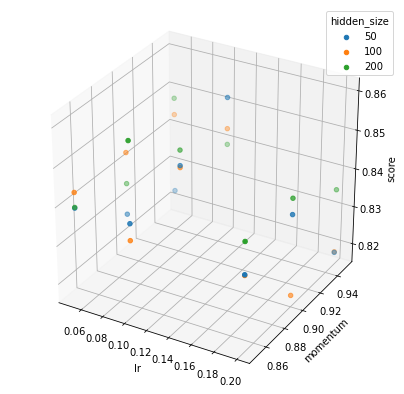

In [12]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
for hidden_size in [50,100,200]:
    result = results[results['hidden_size']==hidden_size]
    ax.scatter3D(result['lr'],result['momentum'],result['score'],label=hidden_size)
ax.legend(title='hidden_size')
ax.set_xlabel('lr')
ax.set_ylabel('momentum')
ax.set_zlabel('score')
plt.show()